In [1]:

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
life = pd.read_csv(r"C:\Users\Acharya\Downloads\datasets\Life Expectancy Data.csv")
print("Dataset dimensions",life.shape,"\n")
print("Attributes include\n",life.columns,"\n")
life.info()

# Print the first 7 row
life.head(20)

Dataset dimensions (2938, 22) 

Attributes include
 Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure    

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
life.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# OBSERVATIONS


Heatmap indicates that the missing values are significantly more in 'GDP' 'Population' 'Hepatitis B' columns compared to the other columns hence it is not a good idea to replace them with a mean or forward fill or backward fill. therefore they are needed to be dropped from the analysis.

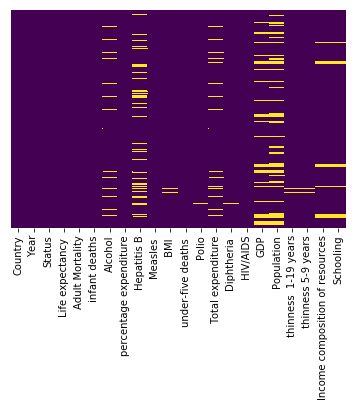

In [5]:
sns.heatmap(life.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Why these attributes are dropped ?

GDP Population Hepatitis B columns are dropped because of the presence of many missing values and year column is dropped as it did not serve any purpose in predicting the life expectancy of a country. 

In [5]:
life.drop(["Year","GDP","Population","Hepatitis B"],axis=1,inplace=True)
print("Modified Dataset dimensions after dropping insignificant columns",life.shape,"\n")
print("Attributes include\n",life.columns,"\n")

Modified Dataset dimensions after dropping insignificant columns (2938, 18) 

Attributes include
 Index(['Country', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ',
       ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object') 



In [6]:
life_exp=life.interpolate()

In [7]:
life_exp.isnull().sum()

Country                            0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [8]:
cat_cols = ['Country','Status']
life_exp = pd.get_dummies(life_exp,columns=cat_cols,drop_first=True,)
print("Modified dimensions after dummification",life_exp.shape)

Modified dimensions after dummification (2938, 209)


In [9]:
X = life_exp.copy().drop("Life expectancy ",axis=1)
y = life_exp["Life expectancy "]
print("Input attributes X:", X.shape)
print("Input attributes X:", X.columns)
print("Output attribute y:", y.shape) 

Input attributes X: (2938, 208)
Input attributes X: Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ',
       ...
       'Country_United States of America', 'Country_Uruguay',
       'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Venezuela (Bolivarian Republic of)', 'Country_Viet Nam',
       'Country_Yemen', 'Country_Zambia', 'Country_Zimbabwe',
       'Status_Developing'],
      dtype='object', length=208)
Output attribute y: (2938,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("Input attributes X - Train dataset:", X_train.shape)
print("Input attributes X - Test dataset:", X_test.shape)
print("Output attribute y - Train dataset:", y_train.shape)
print("Output attribute y - Test dataset:", y_test.shape)

Input attributes X - Train dataset: (2350, 208)
Input attributes X - Test dataset: (588, 208)
Output attribute y - Train dataset: (2350,)
Output attribute y - Test dataset: (588,)


In [11]:
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,:5])

X_train.iloc[:,:5] = scaler.transform(X_train.iloc[:,:5])
X_test.iloc[:,:5] = scaler.transform(X_test.iloc[:,:5])

C:\Users\Acharya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Acharya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Acharya\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Acharya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y_pred = lin_model.predict(X_test)

In [14]:
mse = (mean_squared_error(y_test, y_pred))

In [15]:
mse

3.827272928129934

In [16]:
rmse = np.sqrt(mse)

In [17]:
rmse

1.9563417206945044

In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))



The model performance for training set
--------------------------------------
RMSE is 1.9563417206945044
R2 score is 0.9562080708927873


In [19]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 1.9563417206945044
R2 score is 0.9562080708927873


# What are the steps needed to improve this model?

 -MULTICOLLINEARITY CHECK - whether the independent variables are too correlated with each other 
 
 
 
-AUTOCOLLINEARITY CHECK - Durbin watson's test
 
 
 
 -HOMOSCEDASTICITY - check whether the residuals are equal across the line
